### Import Packages:

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import matplotlib as mpl

import calendar
%matplotlib inline


### Import Dataset:

[Chicago Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

This dataset contains reported crime incidents in Chicago from 2001 to the present. The data is sourced from the Chicago Police Department's CLEAR system, with addresses shown at the block level for privacy. The dataset may include preliminary and unverified information, and the crime classifications can change upon further investigation. Therefore, the accuracy and completeness of the data are not guaranteed.

Download on August 7, 2024

In [2]:
crimes = pd.read_csv("Crimes_-_2001_to_Present_20240807.csv")

### Exploring the Dataset:

In [3]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [4]:
crimes.shape

(8124924, 22)

In [5]:
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.124924e+06,8.124924e+06,8.124877e+06,7.510095e+06,7.511471e+06,8.035359e+06,8.035359e+06,8.124924e+06,8.035359e+06,8.035359e+06
mean,7.287716e+06,1.184831e+03,1.129783e+01,2.277234e+01,3.742490e+01,1.164624e+06,1.885857e+06,2.010507e+03,4.184239e+01,-8.767141e+01
std,3.651799e+06,7.035314e+02,6.959403e+00,1.385536e+01,2.154685e+01,1.697767e+04,3.246718e+04,6.695795e+00,8.932984e-02,6.151431e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.924455e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153023e+06,1.859130e+06,2.005000e+03,4.176883e+01,-8.771351e+01
50%,7.282940e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166163e+06,1.890860e+06,2.009000e+03,4.185618e+01,-8.766571e+01
75%,1.055823e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176389e+06,1.909370e+06,2.016000e+03,4.190700e+01,-8.762811e+01
max,1.355479e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.024000e+03,4.202291e+01,-8.752453e+01


In [7]:
crimes.isnull().sum(axis=0)

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13379
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89565
Y Coordinate             89565
Year                         0
Updated On                   0
Latitude                 89565
Longitude                89565
Location                 89565
dtype: int64

In [8]:
crimes[crimes['Longitude'].isnull()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
5,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
27,12416972,JE293535,10/01/2020 12:01:00 AM,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,14.0,63.0,02,NaN,NaN,2020,09/14/2023 03:41:59 PM,NaN,NaN,NaN
28,12416974,JE293464,08/10/2011 12:01:00 AM,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,14.0,63.0,02,NaN,NaN,2011,09/14/2023 03:41:59 PM,NaN,NaN,NaN
29,12536164,JE439378,09/24/2015 12:00:00 AM,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,APARTMENT,False,True,...,14.0,63.0,02,NaN,NaN,2015,09/14/2023 03:41:59 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8124028,13048321,JG160889,09/17/2021 12:00:00 AM,016XX N MASON AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,29.0,25.0,17,NaN,NaN,2021,04/22/2023 03:40:07 PM,NaN,NaN,NaN
8124204,13062643,JG248264,04/12/2022 12:00:00 AM,074XX S WABASH AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,6.0,69.0,11,NaN,NaN,2022,05/05/2023 03:41:14 PM,NaN,NaN,NaN
8124253,13092803,JG284184,08/23/2021 12:00:00 AM,036XX W SHAKESPEARE AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,...,35.0,22.0,17,NaN,NaN,2021,06/02/2023 03:41:42 PM,NaN,NaN,NaN
8124481,13099981,JG292625,03/01/2022 12:00:00 AM,019XX S WABASH AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,33.0,08B,NaN,NaN,2022,06/08/2023 03:42:44 PM,NaN,NaN,NaN


In [9]:
(crimes.isnull().sum(axis=0)/crimes.count()).sort_values()

ID                      0.000000
Updated On              0.000000
Year                    0.000000
FBI Code                0.000000
Domestic                0.000000
Arrest                  0.000000
Beat                    0.000000
Primary Type            0.000000
IUCR                    0.000000
Block                   0.000000
Date                    0.000000
Case Number             0.000000
Description             0.000000
District                0.000006
Location Description    0.001649
Longitude               0.011146
X Coordinate            0.011146
Y Coordinate            0.011146
Latitude                0.011146
Location                0.011146
Community Area          0.081669
Ward                    0.081867
dtype: float64

1.1% of the rows have nulll values for their location data, while the other information looks relevant, the location data is unable to be used.

In [10]:
sb.scatterplot(data = crimes, x = 'X Coordinate', y = 'Y Coordinate')

NameError: name 'sb' is not defined

### Removing Coordinate Columns:

The columns "X Coordinate" and "Y Coordinate" are in a format that isn't the standard coordinates but "The [X/Y] coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block."

Taken from [About Data](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data) and under "What's in this Dataset?" section

This is why it doesn't look close to the typically seen coordinates of Chicago: 41.8781° N, 87.6298° W (Removing these columns)

In [ ]:
crimes = crimes.drop(columns=['X Coordinate', 'Y Coordinate'])

In [ ]:
sb.scatterplot(data = crimes, x = 'Longitude', y = 'Latitude')

In [ ]:
crimes.query("Longitude < -90")['Location'].value_counts()

### Removing Missouri Locations:

While there are no more crimes in (0,0), there look to be 149 in (36.6N, 91.7W)

This location is in in Missouri, a 500 mile, 8 hour journey from Chicago. 

(Move these values to null)

In [ ]:
missouri = crimes["Longitude"] < - 90
crimes.loc[missouri,["Longitude", "Latitude"]] = np.nan

In [ ]:
sb.scatterplot(data = crimes, x = 'Longitude', y = 'Latitude')

### Aspect Ratio Distortion:

While this does look like the shape of the Chicago, the proportions look off. 

In [ ]:
plt.scatter(crimes['Longitude'], crimes['Latitude'])

plt.plot(-87.63,41.88,'go')
plt.plot(-87.63,41.78,'ro')
plt.plot(-87.73,41.88,'yo')
plt.show()

The green point represents the center of chicago, and the yellow and red points represent 0.1 degrees of Longitude and Latitude difference respectively. However while they are the same difference on a coordinate perspective, they have different distances.

Longitude: (Green to Yellow) 8.28km

Latitude: (Green to Red) 11.12km

Each degree of latitude amounts to 34% more disance in the same coordinate difference longitudinally. The map will have to be scaled accordingly.

In [ ]:
plt.figure(figsize = (5,6.7))
plt.scatter(crimes['Longitude'], crimes['Latitude'], s = 1)

plt.plot(-87.63,41.88,'go')
plt.plot(-87.63,41.78,'ro')
plt.plot(-87.73,41.88,'yo')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of Crimes in Chicago')

plt.grid(True)
plt.show()

The proportions of this map look now a lot closer the typical aspect ratio of the city of Chicago. 

### Where are crimes happening?

In [ ]:
plt.figure(figsize = (5,6.7))
plt.scatter(crimes['Longitude'], crimes['Latitude'], s = 1, alpha = 0.002)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of Crimes in Chicago')

plt.grid(True)
plt.show()

Even with dropping the alpha level to as low as possible (0.002), most of the map is still in this fairly dark shade as this is a build up of over 20 years of reported data

In [ ]:
crimes23 = crimes[crimes['Date'].dt.year == 2023]

In [ ]:
crimes23

In [ ]:
plt.figure(figsize = (5,6.7))
plt.scatter(crimes23['Longitude'], crimes23['Latitude'], s = 1, alpha = 0.01)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of Crimes in Chicago in 2023')

plt.grid(True)
plt.show()

Loading it with only crimes from 2023 shows a concentration in the downtown area of Chicago and fewer crimes on the outer parts of the city.

### Annual Crime Trends

In [16]:
crimes['Date'] = pd.to_datetime(crimes['Date'], errors='coerce')
crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] = crimes['Date'].dt.month
crimes['Day'] = crimes['Date'].dt.day
crimes['Dow'] = crimes['Date'].dt.dayofweek
crimes['Hour'] = crimes['Date'].dt.hour

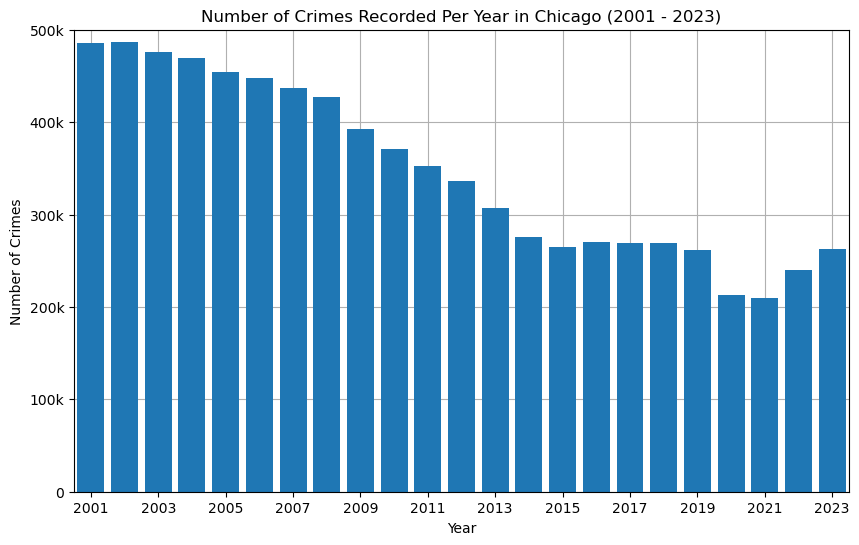

In [58]:
crimes_per_year = crimes['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(crimes_per_year.index,crimes_per_year.values,zorder=2)

plt.title('Number of Crimes Recorded Per Year in Chicago (2001 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')


plt.xticks(np.arange(2001,2025,2))
plt.xlim(2000.5,2023.5)

plt.yticks(np.arange(0,500001,100000), ['0', '100k', '200k', '300k', '400k', '500k'])
plt.ylim(0,500000)

plt.grid(True, zorder=1)

plt.show()

While the number of crimes have gone down since the start of the recording of this datset, there has been an increase in the last to years.
However that looks to be a return to the plateau continuing from 2014/2015 to 2019.

### Crimes per month

In [65]:
pre2024 = crimes[crimes['Year'] < 2024]
crimes_per_month = pre2024['Month'].value_counts()

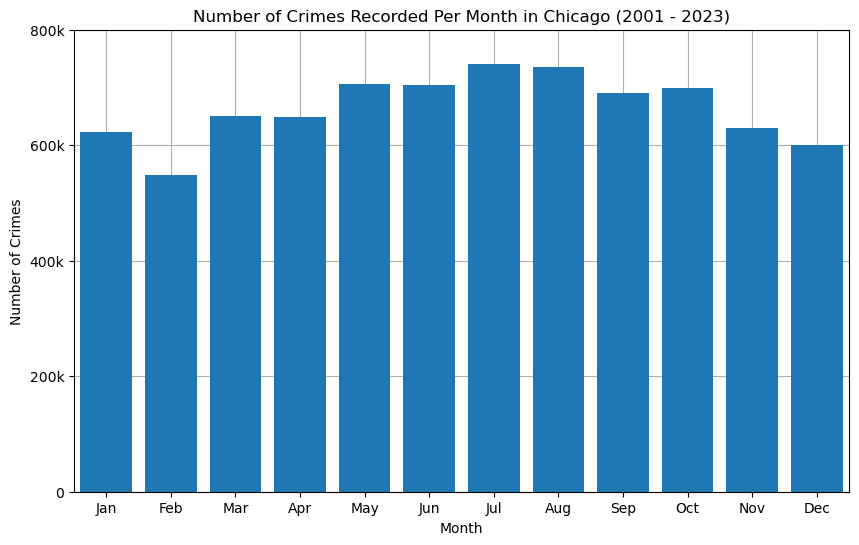

In [72]:
plt.figure(figsize=(10,6))
plt.bar(crimes_per_month.index,crimes_per_month.values,zorder=2)

plt.title('Number of Crimes Recorded Per Month in Chicago (2001 - 2023)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

plt.xticks(np.arange(1,13,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlim(0.5,12.5)

plt.yticks(np.arange(0,800001,200000),['0','200k','400k','600k','800k'])

plt.grid(True, zorder=1)

plt.show()

While this does show that there are more crimes in certain months than others, the month with the lowest crimes is February as it just has fewer days, (3,2, or 1, depending on compared to which month, and with which year)

In [75]:
crimes_per_month.sort_index()

Month
1     622828
2     547947
3     650620
4     648084
5     705308
6     704582
7     741365
8     734769
9     691003
10    699458
11    630468
12    601201
Name: count, dtype: int64

In [147]:
alldates = pre2024[['Date']]
alldates['Date'] = alldates['Date'].dt.date
alldates = alldates.drop_duplicates()
alldates.sort_values(by='Date').reset_index(drop=True)
alldates['Date'] = pd.to_datetime(alldates['Date'], errors='coerce')
alldates['Month'] = alldates['Date'].dt.month

/tmp/ipykernel_381624/1774098632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldates['Date'] = alldates['Date'].dt.date


In [149]:
days_per_month = alldates['Month'].value_counts()
crimes_per_month = crimes_per_month.sort_index()
days_per_month = days_per_month.sort_index()
daily_crimes_per_month = crimes_per_month/days_per_month

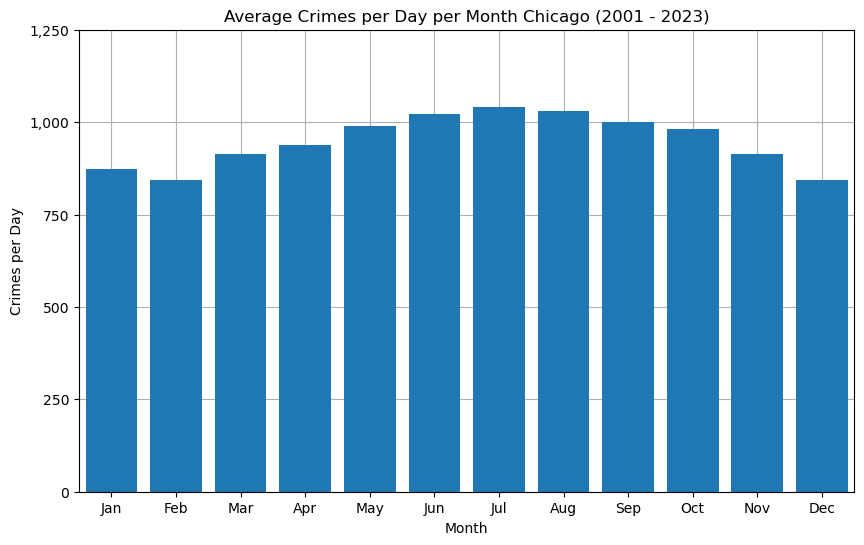

In [165]:
plt.figure(figsize=(10,6))
plt.bar(daily_crimes_per_month.index,daily_crimes_per_month.values,zorder=2)

plt.title('Average Crimes per Day per Month Chicago (2001 - 2023)')
plt.xlabel('Month')
plt.ylabel('Crimes per Day')

plt.xticks(np.arange(1,13,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlim(0.5,12.5)

plt.yticks(np.arange(0,1251,250),['0','250','500','750','1,000','1,250'])
plt.ylim(0,1250)

plt.grid(True, zorder=1)

plt.show()

When looking at the average number of crimes per month, there looks to be some seasonality to it. Peaking in the summer months while having a trough in the winter months.

### Crimes per Hour

In [201]:
crimes_per_hour = pre2024['Hour'].value_counts()
crimes_per_hour = crimes_per_hour.sort_index()

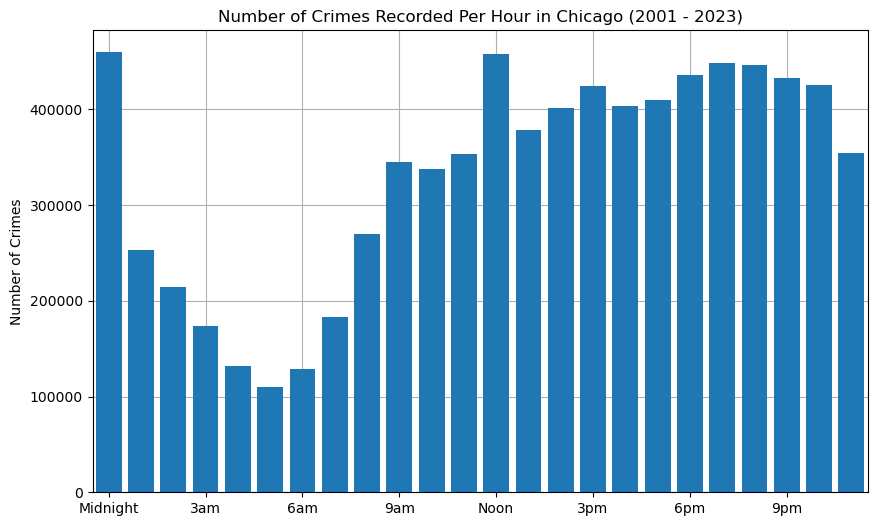

In [214]:
plt.figure(figsize=(10,6))
plt.bar(crimes_per_hour.index,crimes_per_hour.values,zorder=2)
plt.title('Number of Crimes Recorded Per Hour in Chicago (2001 - 2023)')
plt.ylabel('Number of Crimes')

plt.xticks(np.arange(0,24,3),['Midnight', '3am', '6am', '9am', 'Noon', '3pm', '6pm', '9pm'])
plt.xlim(-0.5,23.5)

plt.grid(True, zorder=1)

plt.show()

When taking a look at the number of crimes that happen each hour, there are more crimes happening in the evenings than in the mornings with the times of 6pm to 10pm having spots 3-7 when sorting by the most crimes per hour.

The only two other hours that have more crimes are 12am and 12pm. However this is likely due to the form having a default value of 12 the person filling the form just filling in whether it be "AM" or "PM"

### Crimes per Minute

In [223]:
crimes_per_minute = pre2024['Date'].dt.minute.value_counts()

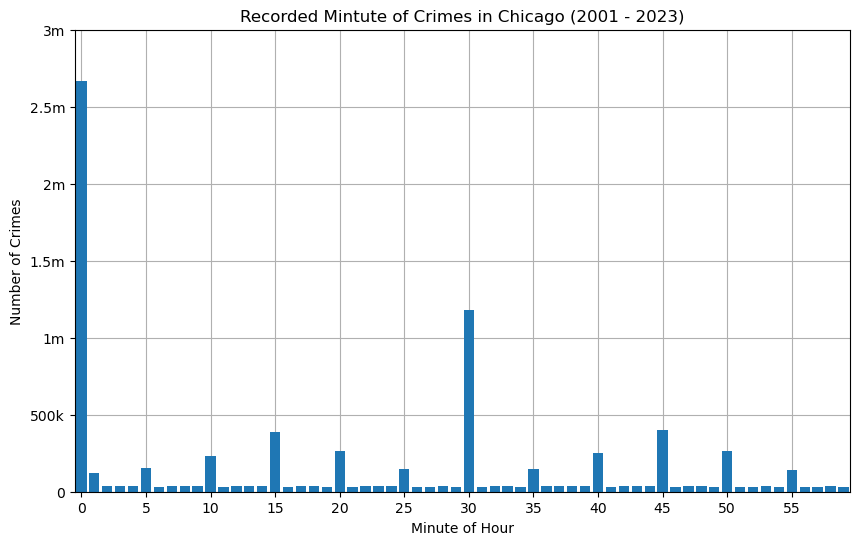

In [252]:
plt.figure(figsize=(10,6))
plt.bar(crimes_per_minute.index,crimes_per_minute.values,zorder=2)
plt.title('Recorded Mintute of Crimes in Chicago (2001 - 2023)')
plt.ylabel('Number of Crimes')
plt.xlabel('Minute of Hour')

plt.xlim(-0.5,59.5)
plt.xticks(np.arange(0,60,5))

plt.ylim(0,3000000)
plt.yticks(np.arange(0,3000001,500000), ['0','500k','1m','1.5m','2m','2.5m','3m'])

plt.grid(True, zorder=1)

plt.show()

In [240]:
perc_crimes_per_minute = crimes_per_minute/pre2024['Date'].count()

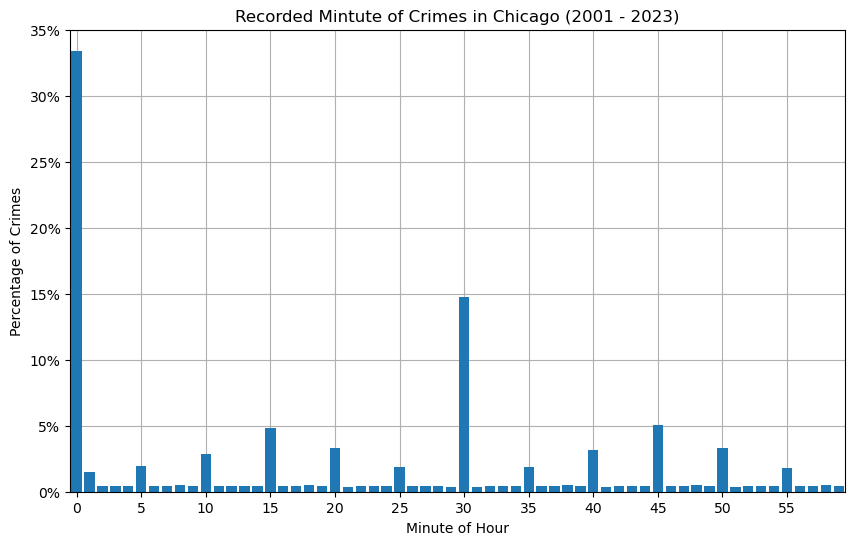

In [251]:
plt.figure(figsize=(10,6))
plt.bar(perc_crimes_per_minute.index,perc_crimes_per_minute.values,zorder=2)
plt.title('Recorded Mintute of Crimes in Chicago (2001 - 2023)')
plt.ylabel('Percentage of Crimes')
plt.xlabel('Minute of Hour')

plt.xticks(np.arange(0,60,5))
plt.xlim(-0.5,59.5)

plt.yticks(np.arange(0,.36,.05),['0%','5%','10%','15%','20%','25%','30%','35%'])
plt.ylim(0,.35)

plt.grid(True, zorder=1)

plt.show()

Rounding the the nearest convenient part of the day was only slightly visible, rounding to the nearest convenient miniute is very visible.
Over 1/3 of all crimes are recorded at the :00 minute mark.

The minutes used seem to follow this hierarchy:

Top of the hour (:00) - ~33%

Half hour (:30) - ~15%

15 minute marks (:15, :45) - ~10%

10 minute marks (:10, :20, :40, :50) - ~13%

5 minute marks (:05, :25, :35, :55) - ~7.5%

All Others - ~21.5%

### Random Ideas:

Arrest % per:
Area/
Type of crime/
Location






In [183]:
hour_dow_crimes = crimes[['Hour','Dow','Date']].groupby(['Hour','Dow']).count()
hour_dow_crimes.rename(columns = {'Date': 'Count'}, inplace=True)
hour_dow_crimes.reset_index(inplace=True)

In [193]:
hour_dow_crimes[hour_dow_crimes['Hour'] == 12]

,Hour,Dow,Count
84,12,0,68267
85,12,1,69680
86,12,2,70678
87,12,3,69141
88,12,4,71138
89,12,5,62156
90,12,6,55140


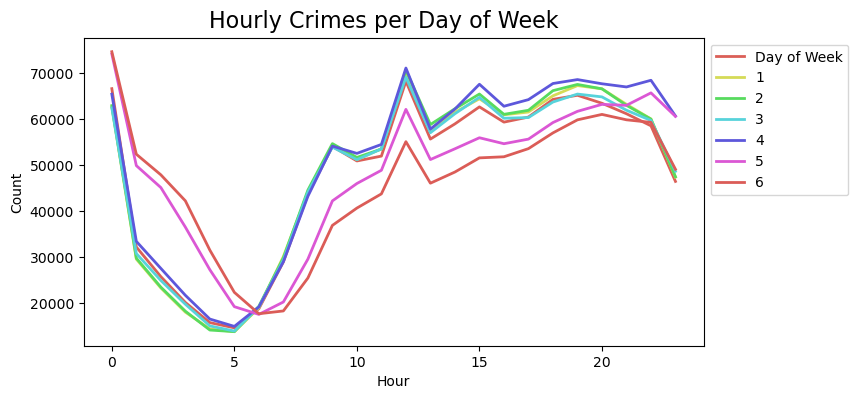

In [191]:
plt.figure(figsize=[8,4])
plt.suptitle('Hourly Crimes per Day of Week', fontsize = 16, y = 0.95)
sns.lineplot(data = hour_dow_crimes, x = 'Hour', y = 'Count', hue = 'Dow', palette='hls', lw=2)

l = plt.legend(bbox_to_anchor=(1, 1))
l.get_texts()[0].set_text('Day of Week')


### Random

In [ ]:
crimes['Community Area'].value_counts().head(10)

In [ ]:
CommAreas = pd.read_csv('CommAreas.csv')

In [ ]:
CommAreas.columns

In [ ]:
CommAreas = CommAreas[['AREA_NUMBE', 'COMMUNITY']]

The community areas are labelled in numbers, which while easier to work with, makes it a bit more difficult to identify each area. 

Info about the Community areas and their names can be found here [here](https://data.cityofchicago.org/d/cauq-8yn6) 

In [ ]:
CommAreas = CommAreas.rename(columns={'AREA_NUMBE': 'Number', 'COMMUNITY': 'Community'})

In [ ]:
CommAreas.sort_values(by=['Number']).reset_index(drop=True)

In [ ]:
# Create the scatterplot using seaborn
plt.figure(figsize=(10, 13.4))
sns.scatterplot(
    data=crimes,
    x='Longitude',
    y='Latitude',
    hue='Community Area',
    palette='tab20',  # Choose a color palette with enough distinct colors
    s=1,  # Size of the points
    alpha=0.2,  # Transparency of the points
    linewidth=0
)

# Customize the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatterplot of Crimes by Community Area')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Community Area')
plt.grid(True)

# Show the plot
plt.show()
